<a href="https://colab.research.google.com/github/biku1998/Applied_Stats/blob/master/Applied_Stats_02_Gaussian_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please read this (https://colab.research.google.com/github/biku1998/Applied_Stats/blob/master/Applied_Stats_01.ipynb) before reading this notebook, if you are a new to stats.

In [2]:
!wget https://raw.githubusercontent.com/biku1998/Plotly-Practice/master/Data/heart.csv

--2020-02-02 06:24:16--  https://raw.githubusercontent.com/biku1998/Plotly-Practice/master/Data/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2020-02-02 06:24:22 (70.7 MB/s) - ‘heart.csv’ saved [11328/11328]



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
df_heart = pd.read_csv('heart.csv')

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Some data info 

* age : age in years
* sex : (1 = male; 0 = female)
* cp  : chest pain type
* trestbps : resting blood pressure (in mm Hg on admission to the hospital)
* chol : serum cholestoral in mg/dl
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
* target : 1(heart-disease) or 0(no-heart-disease) 




In [0]:
df_target_zero = df_heart[df_heart['target'] == 0]
df_target_one = df_heart[df_heart['target'] == 1]

## Gaussian Normal Distribution

<img src=https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Line-Plot-of-the-Gaussian-Probability-Density-Function.png alt="bell shaped curve" width = 400/>

### What is this bell shaped curve ?
    The bell shaped curve is nothing but probablity density function of a gaussian distributed random variable.
    Suppose X is a continuous random variable and if X has a pdf that looks like the bell shaped curve then we can say X has gaussian distribution.

### But why is this important ?
    Because lot's of things in nature follows gaussian distribution. For e.g heights of people, weights of people. 
    So we have a bunch of properties related to this gaussian distribution.
    So if someone tells me a feature in my dataset follows this distribution, 
    i can tell many properties of that feature without even looking at what my data is.

Parameters of the distribution : 
$$mean ( \mu)  ,variance(\sigma^2)$$ 

Gaussian distribution is also called Normal distribution not **Standard Normal Distribution**

Let's see how shape of Gaussian distribution changes as mean and variance changes

<img src= https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg alt = 'gaussian distribution img' width = 400/>

    The above figure is pdf of many means and variance, X axis is mean and Y axis is probablity
*Observations*
* mean controls the height of the distribution
* varaince controls spread of the curve

**When my mean is 0 and variance = 1 i.e the red curve, the result is Standard Normal Distribution**


Notation

$$X - N(\mu , \sigma^2)$$

*The above expression can be readed as random variable X follows normal distribution with mean mu and variance sigma square*

Then $$X - N(\mu=0 , \sigma^2=1) is-(StandardNormalDistribution)$$

In gaussian distribution the peak is always at mean.

Let's look at some mathematical properties of this distribution

Suppose we have a random variable X which is normally distributed with some mean and variance,then

$$P(X=x) = \frac{1}{\sqrt(2 \pi) \sigma} e^{\frac{-(x-\mu)^2}{2\sigma^2 }}$$

Okay let's break the expression

X is continuous random variable, x is a value that the random variable is taking then  **P(X=x)** means Probablity of random variable X being equal to a value x is .... RHS of the expression.


Let's look at the equation for Standard Normal Distribution
$$ \mu = 0 , \sigma^2 = 1$$

$$P(X=x) = \frac{1}{\sqrt(2 \pi)} e^{\frac{-(x)^2}{2}}$$

if we simplify it further i.e remove the constants we will get

$$P(X=x) =  e^{-(x)^2}$$ Or 
$$P(X=x) =  \frac{1}{e^{(x)^2}}$$
when you will plot this function you will get the bell shaped curved.

Some points about the above function

* As x moves away from origin i.e increases, y will decrease.
* This function is symmetric.
* The rate at which y is decreasing is very high.

Want to lear more ? here : https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/more-on-normal-distributions/v/introduction-to-the-normal-distribution




Okay, we know we can build cdf when we have pdf, how does cdf of normal distribution looks like ?

<img src =https://upload.wikimedia.org/wikipedia/commons/c/ca/Normal_Distribution_CDF.svg width = 400  alt = "cdf curve"/>


The red curve is cdf of Standard Normal Distribution




**The 68-95-99.7 rule**

Let's say we have a random variable X which follows a gaussian distribution with mean and variance given

Consider 

$$X - N(\mu=0 , \sigma^2=4)$$

So our Standard deviation 

$$std = \sqrt{\sigma^2} =2$$

then we can tell a lot of interesting properties about this random variable using the above rule

* Since our mean = 0, 50% of points are left side of the mean and 50% of the points are on right side of mean.
* Between $$[\mu, \pm 1 \times std]$$ my 68.4 % points lies
* Similarly between $$[\mu, \pm 2 \times std]$$ my 95 % points lies
* and between $$[\mu, \pm 3 \times std]$$ my 99.7 % points lies

These all facts we know about the random variable X without even conducting our experiment.

In [0]:
def plot_dist(feature):
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(17,7))
    sns.distplot(df_target_zero[feature],hist=True,ax = axes[0])
    sns.distplot(df_target_one[feature],hist=True,ax = axes[1])
    axes[1].set_title(f'Target one {feature} distribution')
    axes[0].set_title(f'Target zero {feature} distribution')
    plt.show()

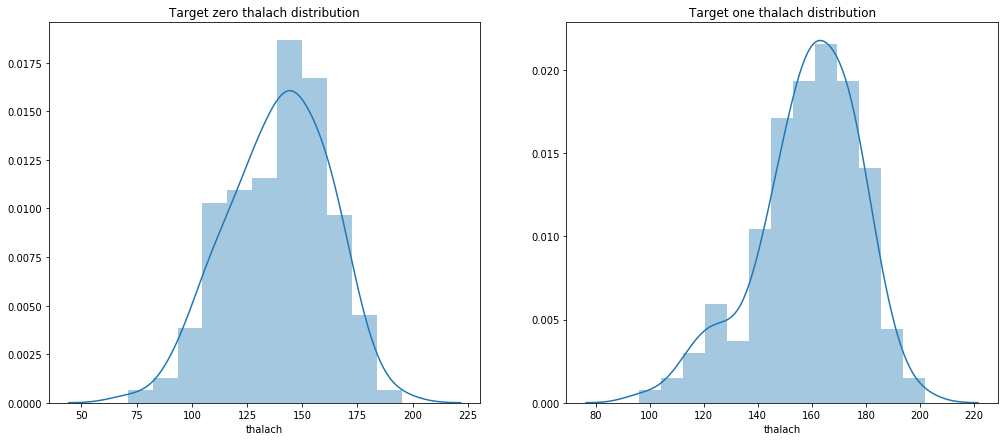

In [7]:
# So let's look at what distributions of our features
feature = "thalach"
plot_dist(feature)

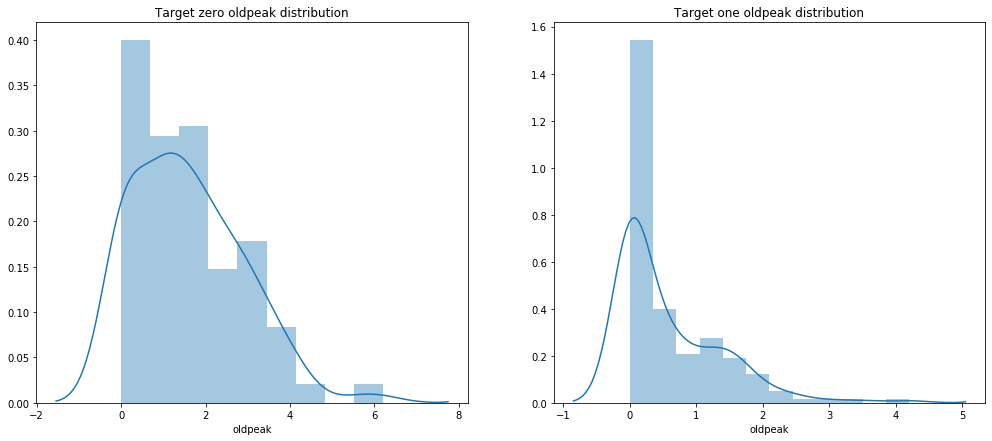

In [14]:
# So let's look at what distributions of our features
feature = "oldpeak"
plot_dist(feature)

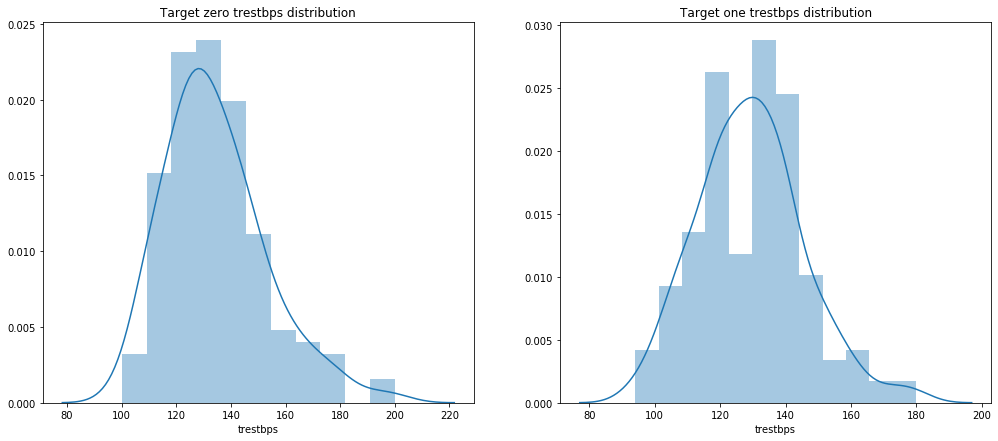

In [8]:
# So let's look at what distributions of our features
feature = "trestbps"
plot_dist(feature)

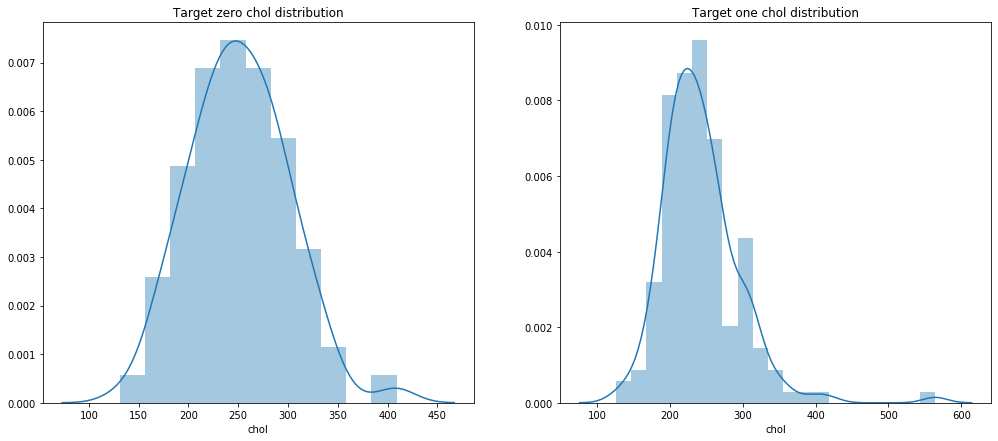

In [9]:
# So let's look at what distributions of our features
feature = "chol"
plot_dist(feature)

**Observation**:  Most of them do have a bell shaped curved but they are not Noraml distributions. Some of them have skewness. 
We will see later how to convert them to Standard normal distribution.

### Skewness : 
Not all distribution are normal in nature. 
Let's take an experiment suppose we have an easy exam, when the result came out we all know that most students will store above average,
this situation will produce a negative skewness.

On the other hand if the test was hard, we know most of the studets will score less than avg, this case will produce 

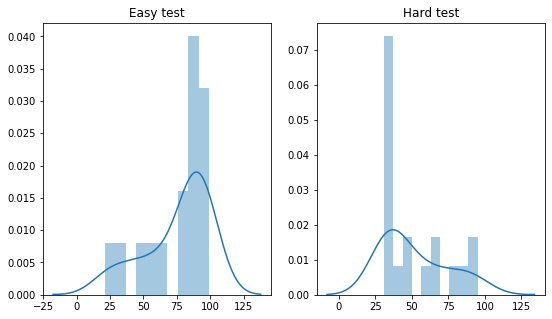

In [12]:
x_easy = [90,89,96,94,99,88,78,87,78,90,99,55,45,32,21,65]
y_hard = [35,34,36,38,32,34,49,31,34,34,36,46,59,66,65,78,89,95,88]

fig,axes = plt.subplots(1,2,figsize= (9,5))
sns.distplot(x_easy,bins=10,ax = axes[0])
axes[0].set_title('Easy test')
sns.distplot(y_hard,bins=10,ax= axes[1])
axes[1].set_title('Hard test')
plt.show()

### Kurtosis :

<img src = https://upload.wikimedia.org/wikipedia/commons/e/e6/Standard_symmetric_pdfs.png  alt = "kurtosis curves" width = 400/>

It measures how values are bundled across the center of the distribution. When the peak of a distribution is hight it means there are many points lie near the mean of the distribution.


We can also observe kurtosis from our dataset features like chol

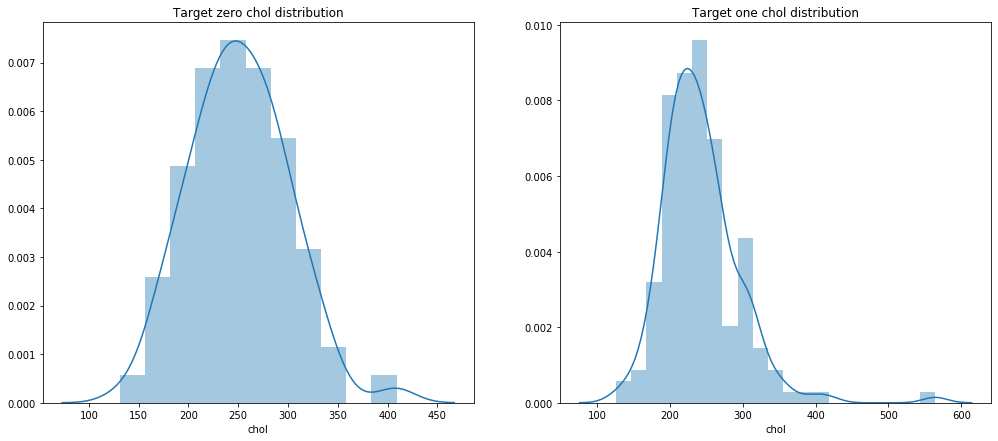

In [15]:
feature = "chol"
plot_dist(feature)

From the above plot we can see that the chol for class zero has less kurtosis on the other hand class one chol readings has more kurtosis.

### Standard Normal variate denoted by Ƶ

We have seen standard normal variate above i.e the gaussian distribution with mean 0 and variance 1.

So can we transform a variable having Normal distribution to Standard Normal Distribution.


Yes we can through

**Standardization** :

$$X = N(\mu , \sigma^2) ---------X = N(\mu=0 , \sigma^2=1) $$

Fomulae:
$$x' = \frac{xi-\mu}{\sigma}$$

$$\sigma = std$$

When we apply the above transformation to our data, All of our data will be in Standard Normal variate Form. 

    But why we will do this?
    if we convert our data to standard normal distribution, we can easily apply our know 68-95-99.7 rule to it. 


In [0]:
def convert_to_std(df,feature,class_title):
    """
    this function will do standardization of data and plot both forms.
    df : dataFrame
    feature : which feature you want to use
    title : title of the plot
    """

    fig,axes = plt.subplots(1,2,figsize = (17,7))
    normal_x  = df[feature].values
    mean = np.mean(normal_x)
    std = np.std(normal_x)
    # print(mean,std)
    std_x = [(x-mean)/std for x in normal_x]
    # print(normal_x)
    # print(std_x)

    sns.distplot(normal_x,ax=axes[0])
    sns.distplot(std_x,ax=axes[1])
    axes[0].set_title(f'{class_title} normal plot for {feature}')
    axes[1].set_title(f'{class_title} standardized plot for {feature}')

    plt.show()

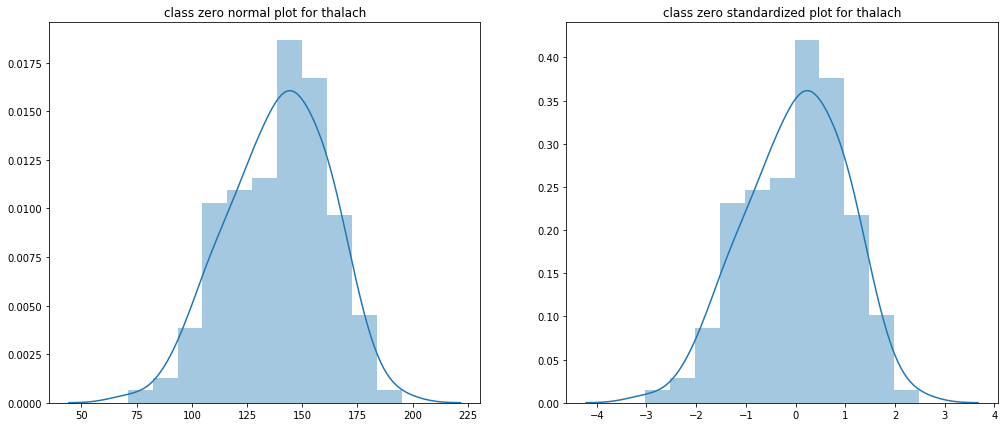

In [27]:
convert_to_std(df_target_zero,'thalach','class zero')

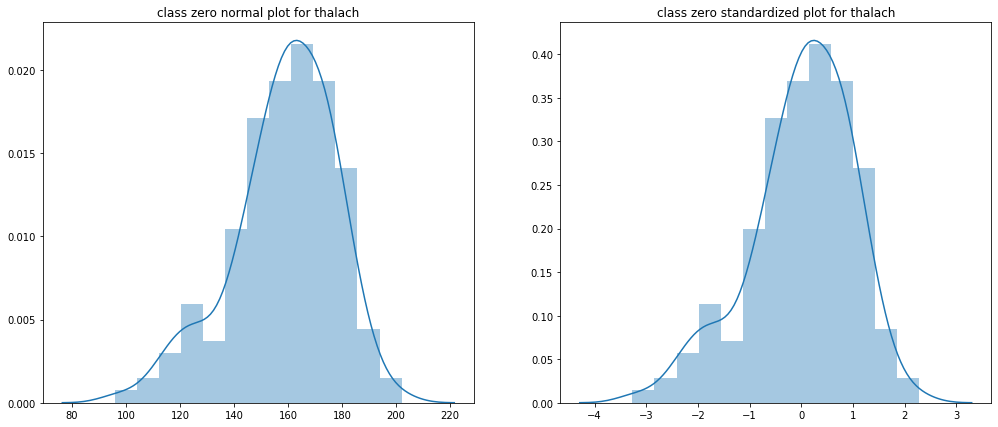

In [28]:
convert_to_std(df_target_one,'thalach','class zero')